# 데이터프레임 시각화

데이터프레임이 내부적으로 `pyplot` 객체를 초기화해 `plt.figure()` 호출할 필요 없음

## #01. 작업준비

1. 패키지 설치

In [25]:
from pandas import read_excel
from matplotlib import pyplot as plt

2. 데이터 추출

년도별 교통사고 발생건수, 사망자수, 부상자수 데이터
>데이터 출처: KOSIS 국가통계포털\
>정제된 데이터 : 이광호 강사님

In [26]:
df = read_excel("https://data.hossam.kr/D01/traffic_acc_year.xlsx")
df

,년도,발생건수,사망자수,부상자수
0,2005,214171,6376,342233
1,2006,213745,6327,340229
2,2007,211662,6166,335906
3,2008,215822,5870,338962
4,2009,231990,5838,361875
5,2010,226878,5505,352458
6,2011,221711,5229,341391
7,2012,223656,5392,344565
8,2013,215354,5092,328711
9,2014,223552,4762,337497


In [27]:
# 추출한 데이터 확인 후 index를 설정
df = read_excel("https://data.hossam.kr/D01/traffic_acc_year.xlsx", index_col='년도')
df 

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


3. 그래프 전역 설정

In [28]:
# 폰트
plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우 전용
#plt.rcParams['font.family'] = 'AppleGothic'   # 맥 전용
# 글자 크기
plt.rcParams["font.size"] = 10
# 그래프 크기
plt.rcParams["figure.figsize"] = (10, 5)
# 음수 설정
plt.rcParams['axes.unicode_minus'] = False

## #02. Line Plot

1. 특정 컬럼에 대한 시각화 - [ ]

기본적으로 DataFrame의 컬럼 이름이 label이 되지만\
plot() 메서드에 label 파라미터를 설정해 다른 이름으로 변경 가능

In [29]:
df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


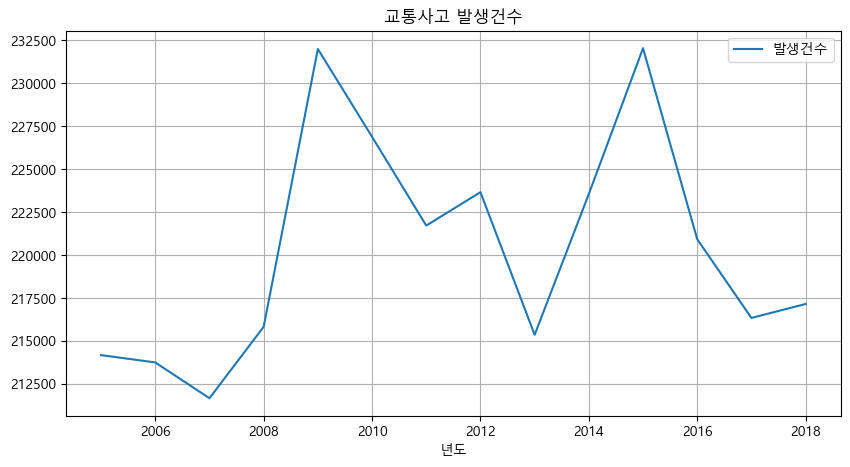

In [30]:
df['발생건수'].plot()   #plot(선) 그래프 생성
plt.title("교통사고 발생건수")  #그래프 제목
plt.grid()  #바탕 선 생성
plt.legend()    #라벨 생성
plt.show()  #그래프 시각화
plt.close() #그래프 종료

위의 그래프와 label의 유무를 비교

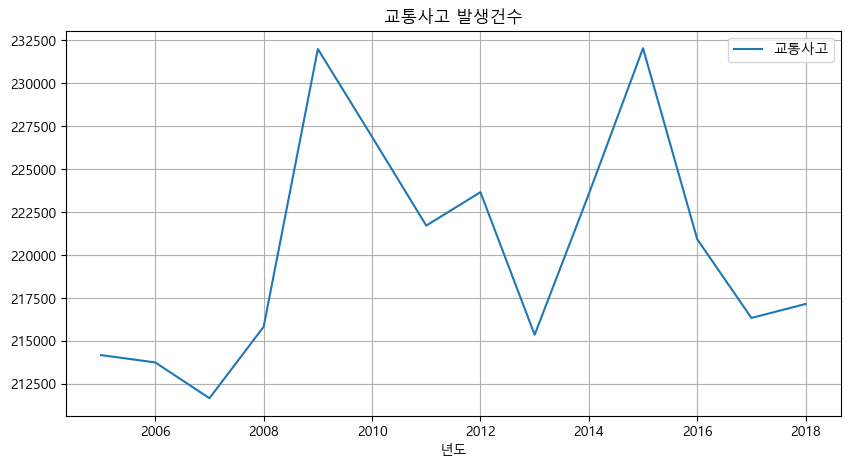

In [31]:
df['발생건수'].plot(label='교통사고')
plt.title("교통사고 발생건수")
plt.grid()
plt.legend()
plt.show()
plt.close()

2. 2개 이상 컬럼에 대한 시각화 - filter

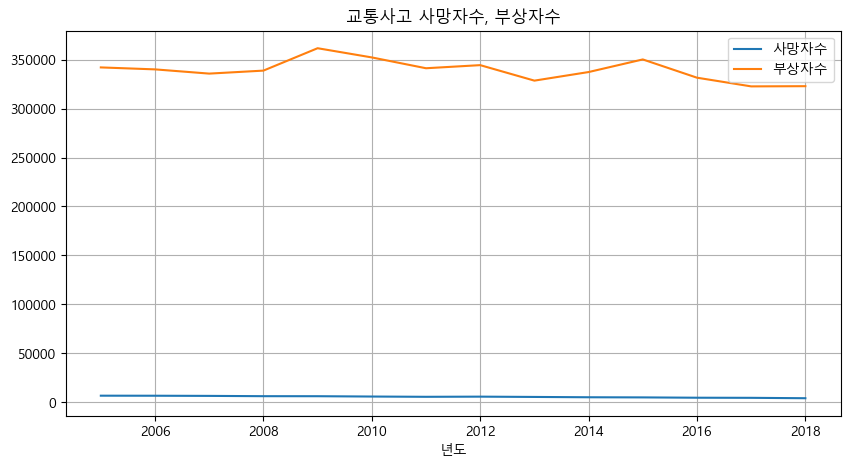

In [32]:
df.filter(['사망자수', '부상자수']).plot()
plt.title("교통사고 사망자수, 부상자수")
plt.grid()
plt.legend()
plt.show()
plt.close()

3. 전체 컬럼에 대한 시각화

발생건수, 사망자수, 부상자수

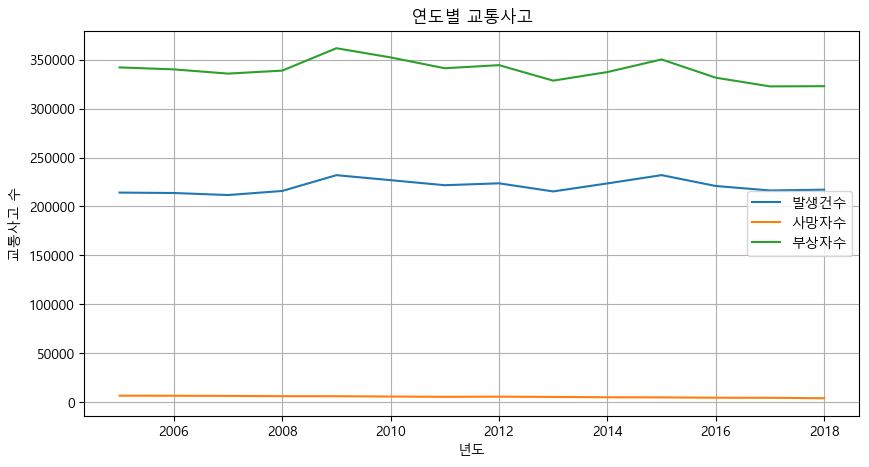

In [33]:
df.plot()
plt.title("연도별 교통사고")
plt.ylabel("교통사고 수")
plt.grid()
plt.legend()
plt.show()
plt.close()

## #03. Bar Plot

1. 특정 컬럼에 대한 시각화 - [ ]

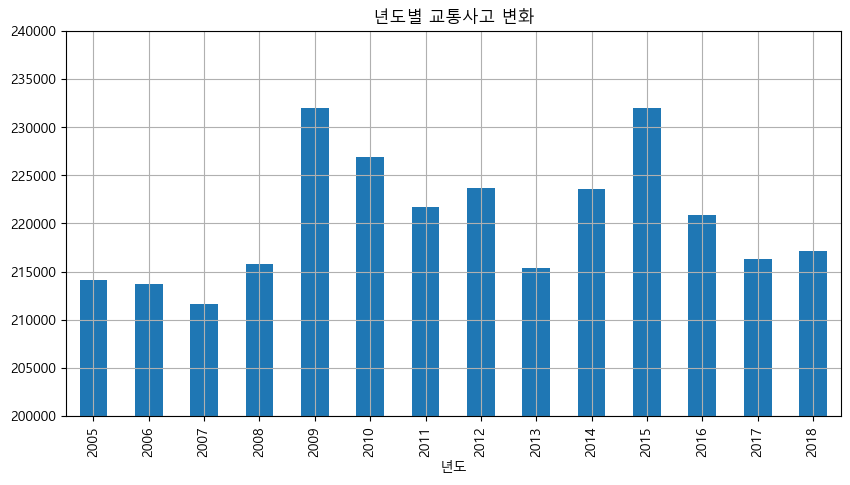

In [34]:
df['발생건수'].plot.bar()
plt.grid()
plt.title("년도별 교통사고 변화")
plt.ylim(200000, 240000)    #y축 값 설정
plt.show()
plt.close()

rot를 사용한 x 축 값 회전

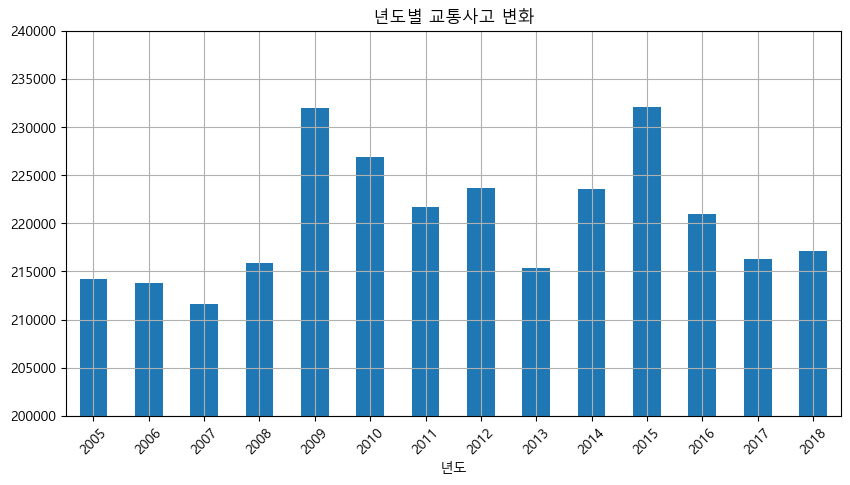

In [35]:
df['발생건수'].plot.bar(rot=45)
plt.title("년도별 교통사고 변화")
plt.ylim(200000, 240000)    #y축 값 설정
plt.grid()
plt.show()
plt.close()

2. 2개 이상 컬럼에 대한 시각화 - filter

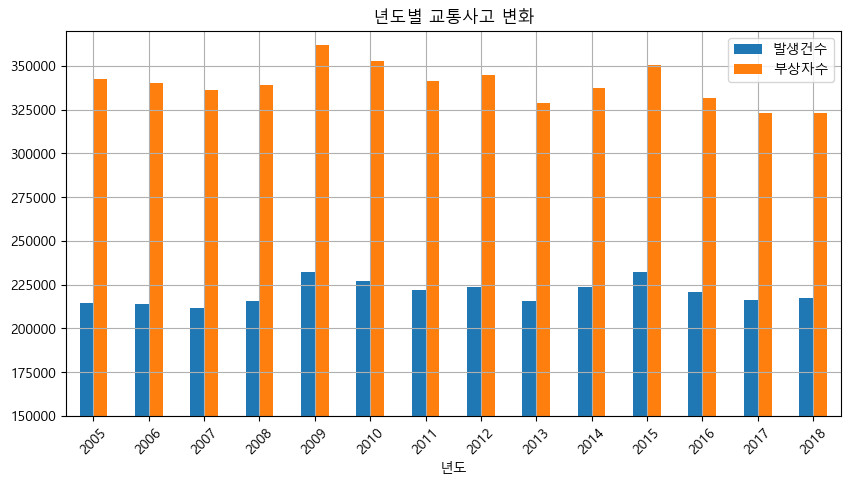

In [36]:
df.filter(['발생건수','부상자수']).plot.bar(rot=45) #여러 컬럼을 삽입
plt.title("년도별 교통사고 변화")
plt.grid()
plt.legend()
plt.ylim(150000, 370000)    #y축 값 설정
plt.show()
plt.close()

3. 전체 컬럼에 대한 시각화

발생건수, 사망자수, 부상자수

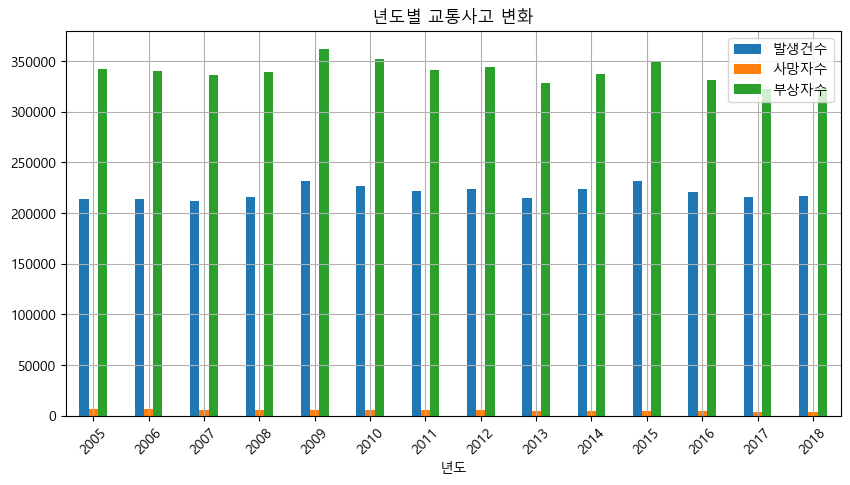

In [37]:
df.plot.bar(rot=45)
plt.grid()
plt.legend()
plt.title("년도별 교통사고 변화")
plt.show()
plt.close()

## #04. 산점도 그래프

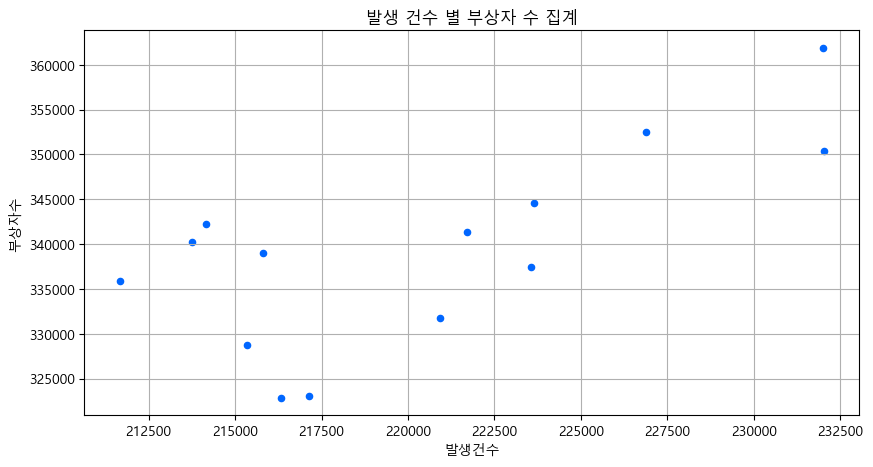

In [38]:
df.plot.scatter(x='발생건수', y='부상자수', color="#0066ff")
plt.title("발생 건수 별 부상자 수 집계")
plt.grid()
plt.show()
plt.close()

## #05. 파이 그래프

dataframe의 index가 파이 그래프의 각 조각이 된다

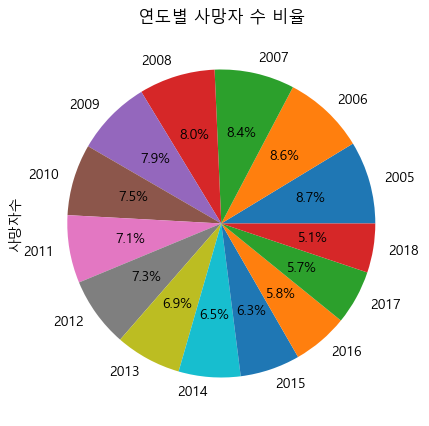

In [39]:
df['사망자수'].plot.pie(autopct='%0.1f%%')
plt.title("연도별 사망자 수 비율")
plt.show()
plt.close()